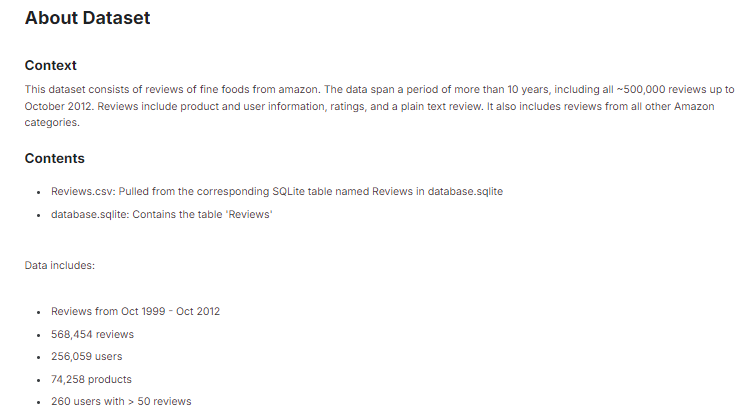

In [4]:
import pandas as pd
import sqlite3

In [3]:
con = sqlite3.connect('database.sqlite')
# cur = con.cursor()
con

In [5]:
filtered_data = pd.read_sql_query(""" select * from Reviews """, con)
filtered_data.shape

(568454, 10)

In [6]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
filtered_data['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [8]:
# 1 and 2 ratings are bad, 4 and 5 are good, 3 is avergae
# So we drop 3 and combine good and bad to make it as binary classification

filtered_data = pd.read_sql_query(""" select * from Reviews where Score != 3""", con)
filtered_data.shape

(525814, 10)

In [9]:
# Liniting the data frame to 5000

# 1 and 2 ratings are bad, 4 and 5 are good, 3 is avergae
# So we drop 3 and combine good and bad to make it as binary classification

filtered_data = pd.read_sql_query(""" select * from Reviews where Score != 3 limit 5000""", con)
filtered_data.shape

(5000, 10)

In [10]:
def partition(x):
    
    if x < 3:
        return 0

    return 1

In [12]:
actual_score = filtered_data['Score']
positive_negative = actual_score.map(partition)
filtered_data['Score'] = positive_negative

In [13]:
filtered_data['Score'].value_counts()

Score
1    4187
0     813
Name: count, dtype: int64

In [14]:
x = filtered_data[['Text']]
y = filtered_data['Score']

x

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
4995,"My baby didn't seem into these dinners, so I t..."
4996,This is great! Organic baby food options - de...
4997,My little guy loves to try new foods..so this ...
4998,We ordered the Earth's best 2nd dinner variety...


In [15]:
y

0       1
1       0
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: Score, Length: 5000, dtype: int64